In [165]:
# Import libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ignore warning messages:
import warnings
warnings.filterwarnings('ignore')

In [166]:
# Reading Data
df = pd.read_csv("https://raw.githubusercontent.com/AbeerAlghamdi1/SDAIA_Final_Project/main/Dataset/online_shoppers_intention.csv")

# Showing the first 5 rows of data:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [167]:
# Showing the number of rows and columns in data:
df.shape

(12330, 18)

In [168]:
# Data information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [169]:
# Description of data:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [170]:
# Showing missing data:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [171]:
# Calculate duplicate values:
df.duplicated().sum()

125

In [172]:
# Remove duplicate values:
df.drop_duplicates(inplace=True)

In [173]:
# Data shape after removing duplicate values:
df.shape

(12205, 18)

In [174]:
# Counts the unique values:
df['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

## Visualization

In [175]:
# Checking the distribution of revenue:

def plot_data_count(df, col, return_pct_share=True, hue=None, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    
    plt.show()
    
    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(df[col].value_counts(normalize=True)*100)

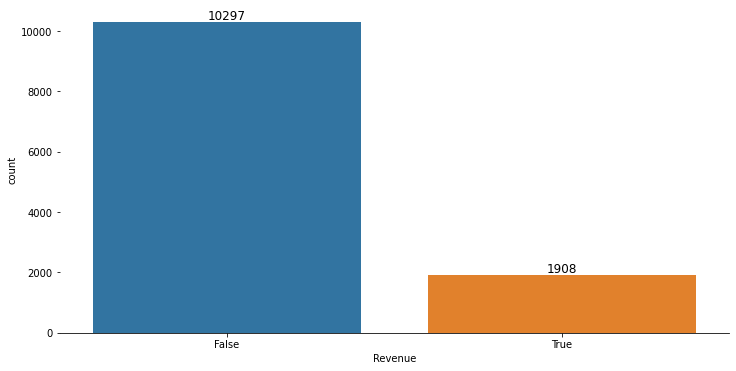



Percent share for each category:
False    84.367063
True     15.632937
Name: Revenue, dtype: float64


In [176]:
plot_data_count(df, 'Revenue')


* **Only 15.63% percent of customers ended up making purchase.**  




In [177]:
# Displaying correlation matrix using heatmap:
corr = df.corr()
corr.style.background_gradient(cmap='Blues')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,-0.006586,-0.025622,-0.007262,-0.034643,0.023825,0.136330
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,-0.007529,-0.015742,-0.006729,-0.014991,0.013259,0.091768
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,-0.009721,-0.038787,-0.030317,-0.035197,0.034359,0.093626
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,-0.009734,-0.019573,-0.027891,-0.025126,0.023193,0.069358
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.004194,-0.013586,-0.040108,-0.044223,0.013477,0.156042
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.002870,-0.007724,-0.034869,-0.037390,0.004903,0.150077
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,0.026811,-0.015501,0.002787,0.089184,-0.034808,-0.145091
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,0.016345,-0.003323,-0.000987,0.087478,-0.053061,-0.204320
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.018632,0.045908,0.010588,0.012286,0.010801,0.491894
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,0.012806,0.003528,-0.016450,0.052856,-0.017723,-0.083601


## Data Preparation


In [178]:
# convert Revenue values to 0 and 1 - binary
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
df.Revenue= label_encoding.fit_transform(df.Revenue.astype(str))

In [179]:
label_encoding.classes_ # 0 -> ('False') , 1 -> ('True')

array(['False', 'True'], dtype=object)

In [180]:
# Convert categorical variable to dummy variables:
df= pd.get_dummies(df, columns=['Month','VisitorType','Weekend'])

In [181]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [182]:
# select split parameter
x = df.drop(['Revenue'], axis=1)
y = df.Revenue

# splitting into train and test sets for both parameters
x_train, x_test ,y_train , y_test = train_test_split(x,y, train_size=0.8, random_state= 42)

# Modeling:

## Logistic Regression

In [183]:
# Building the model:
lr = LogisticRegression()

# Fit the model on training data:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
# Predict the testing data:
lr_preds = lr.predict(x_test)
lr_preds

array([0, 0, 0, ..., 0, 0, 0])

In [185]:
# Showing the Accuracy:
acc_lr = accuracy_score(y_test , lr_preds)
acc_lr

0.8840639082343302

In [186]:
# Displaying classification report:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      2079
           1       0.72      0.35      0.47       362

    accuracy                           0.88      2441
   macro avg       0.81      0.67      0.70      2441
weighted avg       0.87      0.88      0.87      2441



## KNN

In [187]:
# Building the model:
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on training data:
knn = knn.fit(x_train, y_train)

In [188]:
# Predict the testing data:
knn_preds = knn.predict(x_test)
knn_preds

array([0, 0, 0, ..., 0, 0, 0])

In [189]:
# Showing the Accuracy:
knn_acc = accuracy_score(y_test, knn_preds)
knn_acc

0.8607128226136829

In [190]:
# Displaying classification report:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2079
           1       0.55      0.35      0.42       362

    accuracy                           0.86      2441
   macro avg       0.72      0.65      0.67      2441
weighted avg       0.84      0.86      0.85      2441



## Random Forest Classifier

In [191]:
# Building the model:
rf = RandomForestClassifier()

# Fit the model on training data:
rf = rf.fit(x_train, y_train)

In [192]:
# Predict the testing data:
rf_preds= rf.predict(x_test)
rf_preds

array([0, 1, 0, ..., 0, 0, 0])

In [193]:
# Showing the Accuracy:
acc_rf = accuracy_score(y_test , rf_preds)
acc_rf

0.9041376485047112

In [194]:
# Displaying classification report:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2079
           1       0.74      0.54      0.63       362

    accuracy                           0.90      2441
   macro avg       0.83      0.76      0.79      2441
weighted avg       0.90      0.90      0.90      2441

